In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load,parse_dates=["date"])

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
ride_data_df





,city,date,fare,ride_id
0,Liumouth,2019-01-01 00:08:00,37.91,5.673670e+12
1,Colemanland,2019-01-01 00:46:00,47.74,2.215910e+12
2,Sotoville,2019-01-01 02:07:00,24.07,7.827430e+12
3,Royland,2019-01-01 03:46:00,7.57,5.815380e+12
4,West Heidi,2019-01-01 05:23:00,10.75,6.571510e+12
...,...,...,...,...
2370,Carriemouth,2019-05-08 04:20:00,21.99,1.179980e+11
2371,Raymondhaven,2019-05-08 04:39:00,18.45,1.811570e+12
2372,North Jasmine,2019-05-08 07:29:00,18.55,5.682020e+12
2373,South Karenland,2019-05-08 11:38:00,19.77,7.837160e+12


In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df





,city,date,fare,ride_id,driver_count,type
0,Liumouth,2019-01-01 00:08:00,37.91,5.673670e+12,69,Urban
1,Colemanland,2019-01-01 00:46:00,47.74,2.215910e+12,23,Suburban
2,Sotoville,2019-01-01 02:07:00,24.07,7.827430e+12,10,Suburban
3,Royland,2019-01-01 03:46:00,7.57,5.815380e+12,64,Urban
4,West Heidi,2019-01-01 05:23:00,10.75,6.571510e+12,28,Urban
...,...,...,...,...,...,...
2370,Carriemouth,2019-05-08 04:20:00,21.99,1.179980e+11,52,Urban
2371,Raymondhaven,2019-05-08 04:39:00,18.45,1.811570e+12,11,Urban
2372,North Jasmine,2019-05-08 07:29:00,18.55,5.682020e+12,33,Urban
2373,South Karenland,2019-05-08 11:38:00,19.77,7.837160e+12,4,Urban


In [5]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_drivers=city_data_df.groupby(["type"]).sum()['driver_count']
total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fares=pyber_data_df.groupby(["type"]).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:

#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride=pyber_data_df.groupby("type").mean()['fare']
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [9]:





# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver=total_fares/total_drivers
avg_fare_per_driver




type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({
    
    "Total Rides": total_rides,
    "Total Driver": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride":avg_fare_per_ride,
    "Average Fare per Driver":avg_fare_per_driver
})
pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns.
pyber_summary_df["Total Rides"]=pyber_summary_df["Total Rides"].map('{:,.0f}'.format)
pyber_summary_df["Total Driver"]=pyber_summary_df["Total Driver"].map('{:,.0f}'.format)

pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)




In [13]:
pyber_summary_df


,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [14]:
#Deliverable2

# 1. Read the merged DataFrame
# city_data_df = pd.read_csv(city_data_to_load)
# ride_data_df = pd.read_csv(ride_data_to_load)

# pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df




,city,date,fare,ride_id,driver_count,type
0,Liumouth,2019-01-01 00:08:00,37.91,5.673670e+12,69,Urban
1,Colemanland,2019-01-01 00:46:00,47.74,2.215910e+12,23,Suburban
2,Sotoville,2019-01-01 02:07:00,24.07,7.827430e+12,10,Suburban
3,Royland,2019-01-01 03:46:00,7.57,5.815380e+12,64,Urban
4,West Heidi,2019-01-01 05:23:00,10.75,6.571510e+12,28,Urban
...,...,...,...,...,...,...
2370,Carriemouth,2019-05-08 04:20:00,21.99,1.179980e+11,52,Urban
2371,Raymondhaven,2019-05-08 04:39:00,18.45,1.811570e+12,11,Urban
2372,North Jasmine,2019-05-08 07:29:00,18.55,5.682020e+12,33,Urban
2373,South Karenland,2019-05-08 11:38:00,19.77,7.837160e+12,4,Urban


In [15]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   datetime64[ns]
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   float64       
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 129.9+ KB


In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# total_fare_per_date=pyber_data_df.groupby(['type','date']).sum()[['fare']]
# total_fare_per_date
total_fare_per_date_df =pyber_data_df.groupby(['type','date']).sum()[['fare']]
total_fare_per_date_df.head(20)

fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33
      2019-01-08 06:19:00  19.39
      2019-01-09 15:30:00  31.84
      2019-01-11 04:39:00  16.42
      2019-01-14 07:09:00  18.05
      2019-01-14 15:58:00  54.10
      2019-01-15 21:44:00  30.26
      2019-01-18 00:46:00  15.12
      2019-01-18 07:36:00  43.57
      2019-01-19 11:40:00  49.44
      2019-01-19 12:38:00  38.68
      2019-01-19 20:21:00  56.78
      2019-01-22 12:42:00  13.50
      2019-01-22 15:36:00  10.11
      2019-01-23 06:52:00  40.24
      2019-01-24 13:32:00  34.74

In [17]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   datetime64[ns]
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   float64       
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 129.9+ KB


In [18]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_per_date_df=total_fare_per_date_df.reset_index()
total_fare_per_date_df



,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
total_fare_per_city_per_date=total_fare_per_date_df.pivot(index='date',columns='type',values='fare')
total_fare_per_city_per_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [20]:

# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_between_dates=total_fare_per_city_per_date.loc['1/1/19':'4/28/19']
fare_between_dates


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [21]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fare_between_dates.index=pd.to_datetime(fare_between_dates.index)

fare_between_dates.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [22]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_between_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [23]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fare_between_dates=fare_between_dates.resample('W').sum()

fare_between_dates



type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


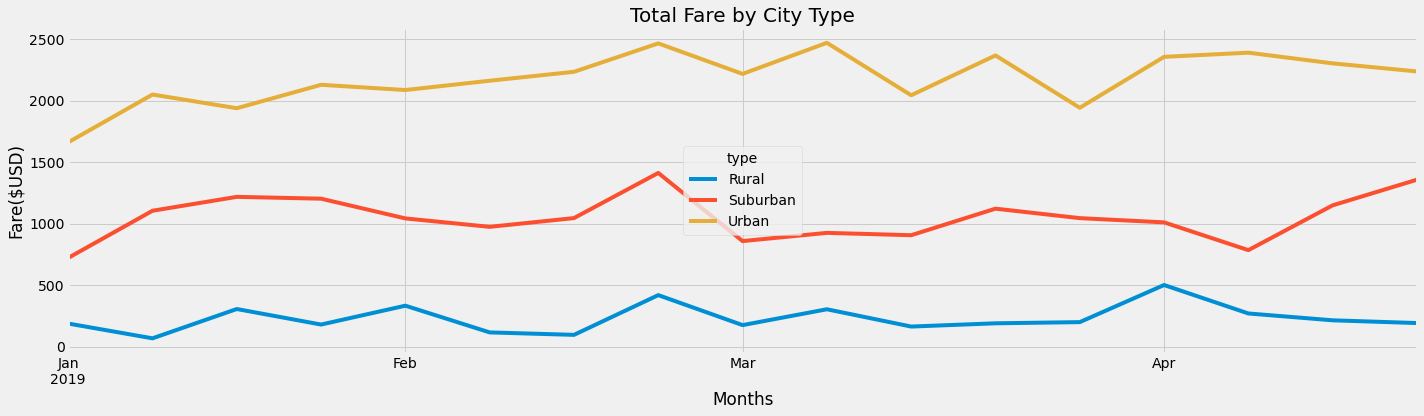

In [24]:
# # 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

 # Import the style from Matplotlib.
from matplotlib import style

style.use('fivethirtyeight')

#fig, total_fare_by_type = plt.subplots()

total_fare_by_type=fare_between_dates.plot(figsize=(20,6))

#total_fare_by_type.plot()
total_fare_by_type.set_title("Total Fare by City Type", fontsize=20)
total_fare_by_type.set_ylabel("Fare($USD)")
total_fare_by_type.set_xlabel("Months")



plt.tight_layout()
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()

